# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [26]:
##Import the packages
import pandas as pd
import numpy as np

StudentsData = pd.read_csv("students-data.csv",sep=";")

In [27]:
StudentsData.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [28]:
StudentsData.shape

(395, 33)

# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [32]:
StudentsData.index.name = "number"

In [33]:
StudentsData.dropna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19


In [34]:
StudentsData.shape

(395, 33)

In [35]:
#No null values

# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [36]:
StudentsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [37]:
StudentsData.select_dtypes(include ='int64') 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
5,16,4,3,1,2,0,5,4,2,1,2,5,10,15,15,15
6,16,2,2,1,2,0,4,4,4,1,1,3,0,12,12,11
7,17,4,4,2,2,0,4,1,4,1,1,1,6,6,5,6
8,15,3,2,1,2,0,4,2,2,1,1,1,0,16,18,19


# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [38]:
StudentsData.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

In [39]:
StudentsData_AD = StudentsData.drop(["traveltime", "studytime", "failures", "famrel", "freetime", "Dalc"], axis=1)

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [40]:
#from sklearn.preprocessing import LabelEncoder
#data['City_encoded'] = LabelEncoder().fit_transform(data['City'])

In [41]:
# Categorical boolean mask
categorical_feature_mask = StudentsData_AD.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = StudentsData_AD.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
StudentsData_AD[categorical_cols] = StudentsData_AD[categorical_cols].apply(lambda col: le.fit_transform(col))
StudentsData_AD[categorical_cols].head(10)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
5,0,1,1,1,1,3,2,3,1,0,1,1,1,1,1,1,0
6,0,1,1,1,1,2,2,1,1,0,0,0,0,1,1,1,0
7,0,0,1,0,0,2,4,1,1,1,1,0,0,1,1,0,0
8,0,1,1,1,0,3,2,1,1,0,1,1,0,1,1,1,0


# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [43]:
StudentsData_AD['G1'] = LabelEncoder().fit_transform(StudentsData_AD['G1'].map(lambda 
                                                                               x: 1 if (x >= 10) 
                                                                               else 0))

In [44]:
StudentsData_AD['G2'] = LabelEncoder().fit_transform(StudentsData_AD['G2'].map(lambda 
                                                                               x: 1 if (x >= 10) 
                                                                               else 0))

In [45]:
StudentsData_AD['G3'] = LabelEncoder().fit_transform(StudentsData_AD['G3'].map(lambda 
                                                                               x: 1 if (x >= 10) 
                                                                               else 0))

In [46]:
StudentsData_AD.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [47]:
StudentsData_AD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int32
sex           395 non-null int32
age           395 non-null int64
address       395 non-null int32
famsize       395 non-null int32
Pstatus       395 non-null int32
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int32
Fjob          395 non-null int32
reason        395 non-null int32
guardian      395 non-null int32
schoolsup     395 non-null int32
famsup        395 non-null int32
paid          395 non-null int32
activities    395 non-null int32
nursery       395 non-null int32
higher        395 non-null int32
internet      395 non-null int32
romantic      395 non-null int32
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 non-null int64
dtyp

In [53]:
#X = StudentsData_AD[["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activties","nursery","higher","internet","romantic","goout","Walc",""]
X = StudentsData_AD.loc[:,StudentsData_AD.columns !='G3']
y = StudentsData_AD['G3']

# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, random_state=42)

# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt 

In [69]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions using the testing set
yPred = model.predict(X_test)

C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
accuracy_score(y_test,yPred)

0.9157894736842105

# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [72]:
model.intercept_

array([0.53074638])

# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [75]:
model.coef_

array([[-1.48452322e-01,  1.37351665e-01, -1.76192013e-01,
         1.88793729e-01, -2.13260476e-01, -2.78451800e-01,
         1.48721590e-01, -4.33635469e-01,  2.58365203e-03,
         2.35891995e-01,  1.60097780e-01,  1.47290347e-01,
        -1.79009624e-01, -3.74434165e-01,  5.53335862e-01,
        -3.85977542e-01, -1.70999218e-01,  1.12797779e+00,
        -2.57881042e-01, -2.97778306e-01, -2.28478411e-01,
         3.57162473e-01,  2.65085229e-02, -2.56716016e-02,
         1.40896088e+00,  3.80738448e+00]])

In [78]:
df_coef = pd.DataFrame(model.coef_ , columns = X_train.columns)
df_coef

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
0,-0.148452,0.137352,-0.176192,0.188794,-0.21326,-0.278452,0.148722,-0.433635,0.002584,0.235892,...,-0.170999,1.127978,-0.257881,-0.297778,-0.228478,0.357162,0.026509,-0.025672,1.408961,3.807384


In [ ]:
#G2 has highest coeffiecient value to impact the model

# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [79]:
model.score(X_test, y_test)

0.9157894736842105

In [118]:
accuracy_score(y_test,yPred)

0.9157894736842105

# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [169]:
BCData = pd.read_csv("bc2.csv")
BCData.shape

(699, 11)

### Observe the no.of records in dataset and type of each feature 

In [170]:
BCData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                          699 non-null int64
ClumpThickness              699 non-null int64
CellSize                    699 non-null int64
CellShape                   699 non-null int64
MarginalAdhesion            699 non-null int64
SingleEpithelialCellSize    699 non-null int64
BareNuclei                  699 non-null object
NormalNucleoli              699 non-null int64
BlandChromatin              699 non-null int64
Mitoses                     699 non-null int64
Class                       699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [171]:
BCData.describe()

,ID,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SingleEpithelialCellSize,NormalNucleoli,BlandChromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Check Missing Values

In [172]:
BCData.isnull().sum(axis=0)

ID                          0
ClumpThickness              0
CellSize                    0
CellShape                   0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
NormalNucleoli              0
BlandChromatin              0
Mitoses                     0
Class                       0
dtype: int64

In [173]:
#There are no NULL values
BCData.isna().sum(axis=0)

ID                          0
ClumpThickness              0
CellSize                    0
CellShape                   0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
NormalNucleoli              0
BlandChromatin              0
Mitoses                     0
Class                       0
dtype: int64

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [174]:
BCData.describe(include='all')

,ID,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [176]:
BCData["BareNuclei"] = BCData["BareNuclei"].map({'?':1})

In [177]:
BCData.describe(include='all')

,ID,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,16.0,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,1.0,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,0.0,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.0,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.0,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,1.0,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,1.0,10.000000,10.000000,10.000000,4.000000


### Print and plot the distribution of target variable (Class - using Histogram) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219163FCC50>]],
      dtype=object)

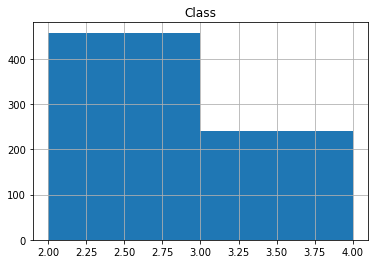

In [178]:
import matplotlib.pyplot as plt
BCData.hist(column='Class',bins=2)

### convert the datatype of Bare Nuclei to `int`

In [179]:
BCData["BareNuclei"]=BCData["BareNuclei"].fillna(0)

In [180]:
BCData["BareNuclei"]= BCData["BareNuclei"].astype(int) 

In [181]:
BCData.dtypes

ID                          int64
ClumpThickness              int64
CellSize                    int64
CellShape                   int64
MarginalAdhesion            int64
SingleEpithelialCellSize    int64
BareNuclei                  int32
NormalNucleoli              int64
BlandChromatin              int64
Mitoses                     int64
Class                       int64
dtype: object

### Standardization of Data (Use Standard Scaler)

In [182]:
# Splitting data into X and y, since target variable should not be standardised 
X = BCData.loc[:,BCData.columns !='Class']
y = BCData['Class']

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Train_BCData_scaled = scaler.fit_transform(X)
print(scaler.mean_)

[1.07170410e+06 4.41773963e+00 3.13447783e+00 3.20743920e+00
 2.80686695e+00 3.21602289e+00 2.28898426e-02 3.43776824e+00
 2.86695279e+00 1.58941345e+00]


C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [184]:
df_bcdata = pd.DataFrame(Train_BCData_scaled , columns = X.columns)
df_bcdata

,ID,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.153056,-0.179662,-0.611825,-0.343912
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,-0.153056,-0.179662,-0.284112,-0.343912
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.153056,-0.179662,-0.611825,-0.343912
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,-0.153056,-0.179662,1.354454,-0.343912
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.153056,-0.179662,-0.611825,-0.343912
5,-0.088513,1.273138,2.251526,2.287222,1.820022,1.710106,-0.153056,2.282766,1.354454,-0.343912
6,-0.086929,-1.214667,-0.699995,-0.743299,-0.633247,-0.549561,-0.153056,-0.179662,-0.611825,-0.343912
7,-0.086180,-0.859266,-0.699995,-0.406574,-0.633247,-0.549561,-0.153056,-0.179662,-0.611825,-0.343912
8,-0.062638,-0.859266,-0.699995,-0.743299,-0.633247,-0.549561,-0.153056,-1.000471,-0.611825,1.990014
9,-0.062638,-0.148465,-0.372048,-0.743299,-0.633247,-0.549561,-0.153056,-0.590067,-0.611825,-0.343912


### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

In [185]:
from pandas.plotting import scatter_matrix

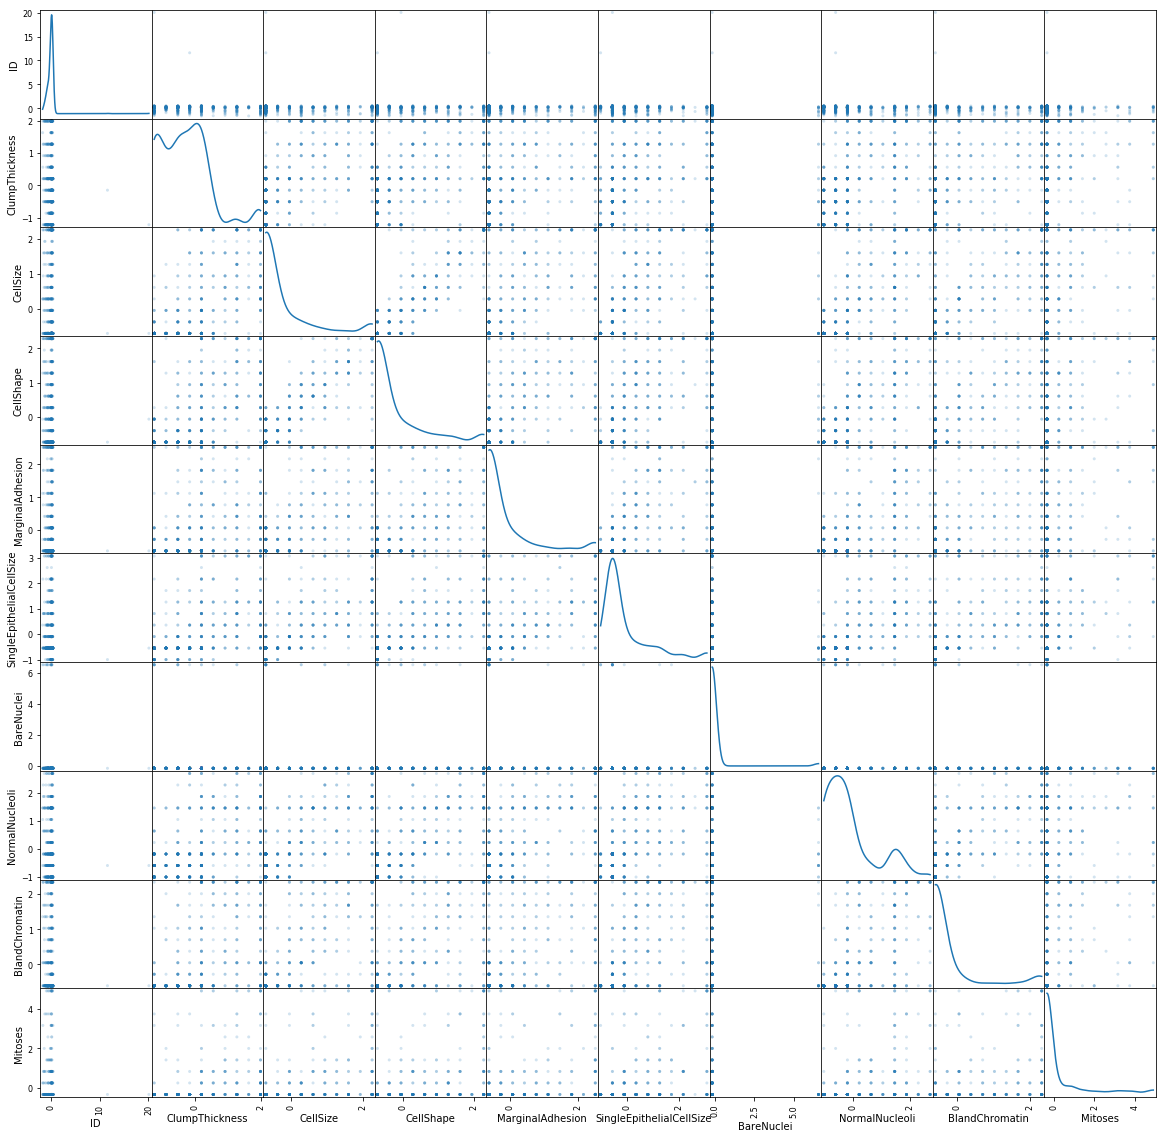

In [186]:
scatter_matrix(df_bcdata, alpha=0.2, figsize=(20, 20),diagonal='kde')
plt.show()

In [187]:
df_bcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ID                          699 non-null float64
ClumpThickness              699 non-null float64
CellSize                    699 non-null float64
CellShape                   699 non-null float64
MarginalAdhesion            699 non-null float64
SingleEpithelialCellSize    699 non-null float64
BareNuclei                  699 non-null float64
NormalNucleoli              699 non-null float64
BlandChromatin              699 non-null float64
Mitoses                     699 non-null float64
dtypes: float64(10)
memory usage: 54.7 KB


In [189]:
#VIF Factor
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(vif.round(1))

vif=VIF("""Class ~ ClumpThickness + CellSize + CellShape + MarginalAdhesion + SingleEpithelialCellSize + BareNuclei + NormalNucleoli + BlandChromatin + Mitoses""", BCData)
vif 

,Variable,VIF
0,Intercept,5.1
1,ClumpThickness,1.8
2,CellSize,7.2
3,CellShape,6.3
4,MarginalAdhesion,2.3
5,SingleEpithelialCellSize,2.5
6,BareNuclei,1.0
7,NormalNucleoli,2.8
8,BlandChromatin,2.4
9,Mitoses,1.4


In [190]:
#VIF > 5 to be removed; and then check again for VIF values
BCData = BCData.drop("CellSize", axis =1)


In [191]:
#VIF Factor
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(vif.round(1))

vif=VIF("""Class ~ ClumpThickness + CellShape + MarginalAdhesion + SingleEpithelialCellSize + BareNuclei + NormalNucleoli + BlandChromatin + Mitoses""", BCData)
vif 

,Variable,VIF
0,Intercept,4.8
1,ClumpThickness,1.8
2,CellShape,3.8
3,MarginalAdhesion,2.2
4,SingleEpithelialCellSize,2.4
5,BareNuclei,1.0
6,NormalNucleoli,2.7
7,BlandChromatin,2.4
8,Mitoses,1.4


### Divide the dataset into feature set and target set

In [ ]:
##Already did that above 

### Divide the Training and Test sets in 70:30 

In [192]:
#from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=42)


### Model 1 : Implement a default Decision Tree model with no attributes

In [196]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [200]:
dt_model.fit(XTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [201]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = XTrain.columns))

                               Imp
ID                        0.041253
ClumpThickness            0.068802
CellSize                  0.678026
CellShape                 0.019290
MarginalAdhesion          0.025278
SingleEpithelialCellSize  0.036916
BareNuclei                0.017754
NormalNucleoli            0.048678
BlandChromatin            0.058005
Mitoses                   0.005999


### Check the training & test accuracy of model 1 

In [202]:
y_predict = dt_model.predict(XTest)

In [203]:
print(dt_model.score(XTrain , yTrain))
print(dt_model.score(XTest , yTest))

1.0
0.9523809523809523


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [207]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, max_leaf_nodes=5)
reg_dt_model.fit(XTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [208]:
y2_predict = reg_dt_model.predict(XTest)
print(reg_dt_model.score(XTrain , yTrain))
print(reg_dt_model.score(XTest , yTest))

0.9366053169734151
0.9238095238095239


### Print the confusion matrix of model 1 and model 2

In [211]:
from sklearn import metrics
print(metrics.confusion_matrix(yTest, y_predict))

[[139   4]
 [  7  60]]


In [212]:
print(metrics.confusion_matrix(yTest, y2_predict))

[[127  16]
 [  0  67]]
